In [1]:
import requests
import json

lat = "41.003799"
lon = "-73.791214"
genius = requests.get(f"https://api.weather.gov/points/{lat},{lon}")

json_file = genius.json()
json_file

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   's': 'https://schema.org/',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#',
   'geometry': {'@id': 's:GeoCoordinates', '@type': 'geo:wktLiteral'},
   'city': 's:addressLocality',
   'state': 's:addressRegion',
   'distance': {'@id': 's:Distance', '@type': 's:QuantitativeValue'},
   'bearing': {'@type': 's:QuantitativeValue'},
   'value': {'@id': 's:value'},
   'unitCode': {'@id': 's:unitCode', '@type': '@id'},
   'forecastOffice': {'@type': '@id'},
   'forecastGridData': {'@type': '@id'},
   'publicZone': {'@type': '@id'},
   'county': {'@type': '@id'}}],
 'id': 'https://api.weather.gov/points/41.0038,-73.7912',
 'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [-73.7912, 41.0038]},
 'properties': {'@id': 'https://api.weather.gov/p

In [2]:
forecast = json_file["properties"]["forecast"] #context is our first key. Then id, then type, then geometry, then propterities
new_request = requests.get(forecast) #properties is our key, and our values are our dicitonary. 
#Forecast is a key inside of a dictionary inside a dictionary

json = new_request.json()
json

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#'}],
 'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-73.7903213, 41.0099429],
    [-73.7948458, 40.9882919],
    [-73.7661636, 40.9848752],
    [-73.7616332, 41.0065259],
    [-73.7903213, 41.0099429]]]},
 'properties': {'updated': '2023-03-20T22:09:19+00:00',
  'units': 'us',
  'forecastGenerator': 'BaselineForecastGenerator',
  'generatedAt': '2023-03-20T22:38:24+00:00',
  'updateTime': '2023-03-20T22:09:19+00:00',
  'validTimes': '2023-03-20T16:00:00+00:00/P7DT21H',
  'elevation': {'unitCode': 'wmoUnit:m', 'value': 91.1352},
  'periods': [{'number': 1,
    'name': 'Tonight',
    'startTime': '2023-03-20T18:00:00-04:00',
    'endTime': '2023-03-21T06:00:00-04:00',
    'isDaytime

In [3]:
a = json['properties']["periods"]
a

for i in a:
    name = i["name"]
    temp = i["temperature"]
    detail = i["detailedForecast"]
    print(name)
    print(temp)
    print(detail)

Tonight
31
Mostly clear, with a low around 31. Southwest wind 3 to 12 mph.
Tuesday
61
Sunny. High near 61, with temperatures falling to around 59 in the afternoon. West wind 3 to 12 mph.
Tuesday Night
37
Mostly cloudy. Low around 37, with temperatures rising to around 39 overnight. Southwest wind 2 to 9 mph.
Wednesday
59
A slight chance of rain showers after 2pm. Mostly cloudy. High near 59, with temperatures falling to around 55 in the afternoon. South wind 3 to 14 mph. Chance of precipitation is 20%.
Wednesday Night
44
A slight chance of rain showers. Mostly cloudy, with a low around 44. South wind 9 to 14 mph. Chance of precipitation is 20%.
Thursday
62
Rain showers likely. Cloudy, with a high near 62. Chance of precipitation is 60%. New rainfall amounts less than a tenth of an inch possible.
Thursday Night
46
A chance of rain showers. Cloudy, with a low around 46. Chance of precipitation is 50%.
Friday
53
Rain showers likely. Cloudy, with a high near 53. Chance of precipitation is 

In [4]:
import requests
import json
import csv
import pandas as pd

API_key = "2c49cf19d62a8e1e93c37684ce195769c30c1549"
url = f"https://api.census.gov/data/2019/pep/charagegroups?get=NAME,POP&HISP=2&for=state:*&key={API_key}"

census_data = requests.get(url)
json_file = census_data.json()

json_file

[['NAME', 'POP', 'HISP', 'state'],
 ['Mississippi', '100110', '2', '28'],
 ['Missouri', '268708', '2', '29'],
 ['Montana', '43289', '2', '30'],
 ['Nebraska', '219645', '2', '31'],
 ['Nevada', '900600', '2', '32'],
 ['New Hampshire', '54589', '2', '33'],
 ['New Jersey', '1856844', '2', '34'],
 ['New Mexico', '1032942', '2', '35'],
 ['New York', '3751058', '2', '36'],
 ['North Carolina', '1025830', '2', '37'],
 ['North Dakota', '31532', '2', '38'],
 ['Ohio', '470462', '2', '39'],
 ['Oklahoma', '438110', '2', '40'],
 ['Oregon', '566847', '2', '41'],
 ['Pennsylvania', '1000150', '2', '42'],
 ['Rhode Island', '172644', '2', '44'],
 ['South Carolina', '307118', '2', '45'],
 ['South Dakota', '37351', '2', '46'],
 ['Tennessee', '391382', '2', '47'],
 ['Texas', '11525578', '2', '48'],
 ['Vermont', '12719', '2', '50'],
 ['Utah', '462051', '2', '49'],
 ['Virginia', '834422', '2', '51'],
 ['Washington', '991721', '2', '53'],
 ['West Virginia', '31162', '2', '54'],
 ['Wisconsin', '413208', '2', '55

In [5]:
data_file = open("census_data.csv", "w", newline="", encoding="utf-8")
csv_writer = csv.writer(data_file)
csv_writer.writerow(["Name", "Population", "HISP-ID", "State"])

for list in json_file:
    if list == json_file[0]:
        pass
    else:
        name = list[0]
        pop = list[1]
        hisp = list[2]
        state = list[3]
        
        csv_writer.writerow([name, pop, hisp, state])
        
data_file.close()

In [6]:
sheet = pd.read_csv("census_data.csv")
sheet

,Name,Population,HISP-ID,State
0,Mississippi,100110,2,28
1,Missouri,268708,2,29
2,Montana,43289,2,30
3,Nebraska,219645,2,31
4,Nevada,900600,2,32
5,New Hampshire,54589,2,33
6,New Jersey,1856844,2,34
7,New Mexico,1032942,2,35
8,New York,3751058,2,36
9,North Carolina,1025830,2,37


In [7]:
from matplotlib import pyplot as plt
import numpy as np

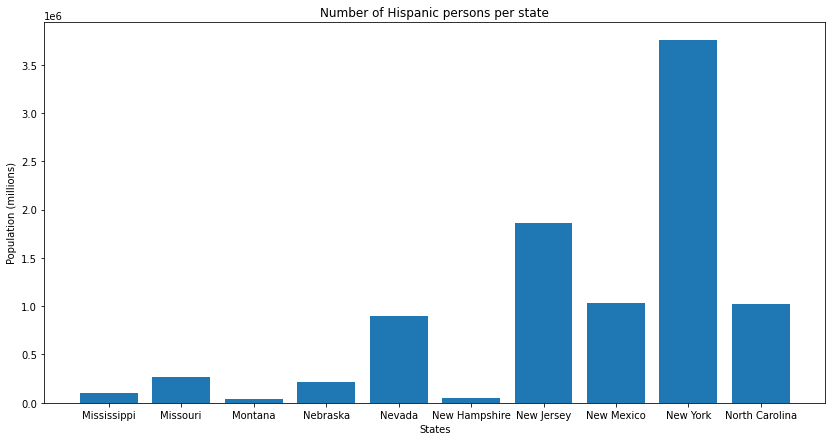

In [8]:
df = pd.DataFrame(sheet) #converting our sheet csv into a dataframe

name = df["Name"] #isolating the two columns I want
pop = df["Population"]

fig = plt.figure(figsize = (14,7)) #setting the size of the box
plt.bar(name[0:10], pop[0:10]) #creating a bar graph and taking the first ten entries. 
                                #could also use the .head() function here

plt.xlabel("States") #labeling my graph
plt.ylabel("Population (millions)") #labeling my graph
plt.title("Number of Hispanic persons per state") #labeling my graph

plt.show() #showing it

In [9]:
#LAB 7

In [10]:
import csv
import requests
import json

lat = "41.003799"
lon = "-73.791214"

genius = requests.get(f"https://api.weather.gov/points/{lat},{lon}")
json_file = genius.json()
forecast = json_file["properties"]["forecast"]
new_request = requests.get(forecast)
json = new_request.json()

a = json['properties']["periods"]

with open('weather.csv', mode='w', newline="") as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['Name', 'Temperature', 'Detailed Forecast'])
    
    for i in a:
        name = i["name"]
        temp = i["temperature"]
        detail = i["detailedForecast"]
        writer.writerow([name, temp, detail])


In [11]:
sheet2 = pd.read_csv("weather.csv")
sheet2

,Name,Temperature,Detailed Forecast
0,Tonight,31,"Mostly clear, with a low around 31. Southwest ..."
1,Tuesday,61,"Sunny. High near 61, with temperatures falling..."
2,Tuesday Night,37,"Mostly cloudy. Low around 37, with temperature..."
3,Wednesday,59,A slight chance of rain showers after 2pm. Mos...
4,Wednesday Night,44,A slight chance of rain showers. Mostly cloudy...
5,Thursday,62,"Rain showers likely. Cloudy, with a high near ..."
6,Thursday Night,46,"A chance of rain showers. Cloudy, with a low a..."
7,Friday,53,"Rain showers likely. Cloudy, with a high near ..."
8,Friday Night,40,"A chance of rain showers. Cloudy, with a low a..."
9,Saturday,48,"Rain showers likely. Cloudy, with a high near ..."


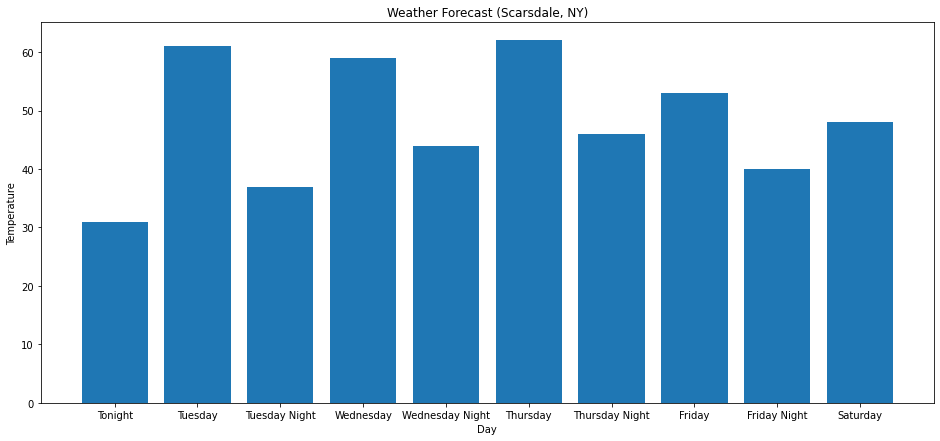

In [12]:
df = pd.DataFrame(sheet2) #converting our sheet csv into a dataframe

name = df["Name"] #isolating the two columns I want
pop = df["Temperature"]

fig = plt.figure(figsize = (16,7)) #setting the size of the box
plt.bar(name[0:10], pop[0:10]) #creating a bar graph and taking the first ten entries. 
                                #could also use the .head() function here

plt.xlabel("Day") #labeling my graph
plt.ylabel("Temperature") #labeling my graph
plt.title("Weather Forecast (Scarsdale, NY)") #labeling my graph

plt.show() #showing it

In [70]:
#Call 1
countryCode = "US"
countryinfo = requests.get(f"https://date.nager.at/api/v3/CountryInfo/{countryCode}")
countryinfo.json()
#Getting the API endpoint for retrieving public holidays for a specific country

{'commonName': 'United States',
 'officialName': 'United States of America',
 'countryCode': 'US',
 'region': 'Americas',
 'borders': [{'commonName': 'Canada',
   'officialName': 'Canada',
   'countryCode': 'CA',
   'region': 'Americas',
   'borders': None},
  {'commonName': 'Mexico',
   'officialName': 'United Mexican States',
   'countryCode': 'MX',
   'region': 'Americas',
   'borders': None}]}

In [41]:
#Call 2 
availablecountries = requests.get(f"https://date.nager.at/api/v3/AvailableCountries")
availablecountries.json()availablecountries.json()
#Getting all the country codes it has for the API

[{'countryCode': 'AD', 'name': 'Andorra'},
 {'countryCode': 'AL', 'name': 'Albania'},
 {'countryCode': 'AR', 'name': 'Argentina'},
 {'countryCode': 'AT', 'name': 'Austria'},
 {'countryCode': 'AU', 'name': 'Australia'},
 {'countryCode': 'AX', 'name': 'Åland Islands'},
 {'countryCode': 'BA', 'name': 'Bosnia and Herzegovina'},
 {'countryCode': 'BB', 'name': 'Barbados'},
 {'countryCode': 'BE', 'name': 'Belgium'},
 {'countryCode': 'BG', 'name': 'Bulgaria'},
 {'countryCode': 'BJ', 'name': 'Benin'},
 {'countryCode': 'BO', 'name': 'Bolivia'},
 {'countryCode': 'BR', 'name': 'Brazil'},
 {'countryCode': 'BS', 'name': 'Bahamas'},
 {'countryCode': 'BW', 'name': 'Botswana'},
 {'countryCode': 'BY', 'name': 'Belarus'},
 {'countryCode': 'BZ', 'name': 'Belize'},
 {'countryCode': 'CA', 'name': 'Canada'},
 {'countryCode': 'CH', 'name': 'Switzerland'},
 {'countryCode': 'CL', 'name': 'Chile'},
 {'countryCode': 'CN', 'name': 'China'},
 {'countryCode': 'CO', 'name': 'Colombia'},
 {'countryCode': 'CR', 'name':

In [15]:
#Call 3
year = 2020
counryCode = "US"
longweekend = requests.get(f"https://date.nager.at/api/v3/LongWeekend/{year}/{countryCode}")
longweekend.json()
# Getting all the long weekends for a specific year and country code

[{'startDate': '2020-01-18',
  'endDate': '2020-01-20',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2020-02-15',
  'endDate': '2020-02-17',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2020-05-23',
  'endDate': '2020-05-25',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2020-07-03',
  'endDate': '2020-07-05',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2020-09-05',
  'endDate': '2020-09-07',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2020-11-26',
  'endDate': '2020-11-29',
  'dayCount': 4,
  'needBridgeDay': True},
 {'startDate': '2020-12-25',
  'endDate': '2020-12-27',
  'dayCount': 3,
  'needBridgeDay': False}]

In [16]:
#Call 4
year = 2020
countryCode = "US"
publicholidays = requests.get(f"https://date.nager.at/api/v3/PublicHolidays/{year}/{countryCode}")
publicholidays.json()
# Getting all the public holidays for a specific year and country code

[{'date': '2020-01-01',
  'localName': "New Year's Day",
  'name': "New Year's Day",
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2020-01-20',
  'localName': 'Martin Luther King, Jr. Day',
  'name': 'Martin Luther King, Jr. Day',
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2020-02-17',
  'localName': 'Presidents Day',
  'name': "Washington's Birthday",
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2020-04-10',
  'localName': 'Good Friday',
  'name': 'Good Friday',
  'countryCode': 'US',
  'fixed': False,
  'global': False,
  'counties': ['US-CT',
   'US-DE',
   'US-HI',
   'US-IN',
   'US-KY',
   'US-LA',
   'US-NC',
   'US-ND',
   'US-NJ',
   'US-TN'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2020-04-

In [40]:
#Call 5
countryCode = "US"
today_holiday = requests.get(f"https://date.nager.at/api/v3/IsTodayPublicHoliday/{countryCode}")

today_holiday.raise_for_status()
if today_holiday == 200:
    print(today_holiday)
else:
    print("Not a public holiday today")
# Checking if today is a public holiday for a specific country and if not, print that its not

Not a public holiday today


In [74]:
#Call 6
country_code = "US"
next_holidays = requests.get(f'https://date.nager.at/api/v3/NextPublicHolidays/{country_code}')
next_holidays.json()

#Getting the next public holidays for a specific country

[{'date': '2023-04-07',
  'localName': 'Good Friday',
  'name': 'Good Friday',
  'countryCode': 'US',
  'fixed': False,
  'global': False,
  'counties': ['US-CT',
   'US-DE',
   'US-HI',
   'US-IN',
   'US-KY',
   'US-LA',
   'US-NC',
   'US-ND',
   'US-NJ',
   'US-TN'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-05-29',
  'localName': 'Memorial Day',
  'name': 'Memorial Day',
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-06-19',
  'localName': 'Juneteenth',
  'name': 'Juneteenth',
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': 2021,
  'types': ['Public']},
 {'date': '2023-07-04',
  'localName': 'Independence Day',
  'name': 'Independence Day',
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-09-04',
  'localName': 'Labor Day',
  'name'

In [72]:
#Call 7
next_holidays = requests.get("https://date.nager.at/api/v3/NextPublicHolidaysWorldwide")
next_holidays.json()
# Getting the next public holidays for all countries

[{'date': '2023-03-20',
  'localName': 'Día de San José',
  'name': "Saint Joseph's Day",
  'countryCode': 'CO',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'San José',
  'name': "St. Joseph's Day",
  'countryCode': 'ES',
  'fixed': True,
  'global': False,
  'counties': ['ES-MD'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'Natalicio de Benito Juárez',
  'name': "Benito Juárez's birthday",
  'countryCode': 'MX',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'Otago Anniversary Day',
  'name': 'Otago Anniversary Day',
  'countryCode': 'NZ',
  'fixed': False,
  'global': False,
  'counties': ['NZ-OTA'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'Independence Day',
  'name': 'Independence Day',
  'countryCode': 'TN',

In [73]:
import requests

countries = ["JP", "FR", "DE", "FR", "CN", "AU", "BR", "MX", "US", "KR"] #countries getting data from

numholidays = 0 #storing the number of holidays for each country to add on and sum up later

for i in countries:
    file = f"https://date.nager.at/api/v3/PublicHolidays/2023/{i}"
    new_request = requests.get(file)
    holidays = new_request.json()
    
    print(f"Holidays for {i}:")
    
    for i in holidays: #going through each holiday in the list
        print(f"{i['name']}") #printing the name of each holiday
    print(f"                                  total holidays: {len(holidays)}\n")
    numholidays += len(holidays) #keep adding onto the total number of holidays

print(f"Total number of holidays from all countries: {numholidays}")


Holidays for JP:
New Year's Day
Coming of Age Day
Foundation Day
The Emperor's Birthday
Vernal Equinox Day
Shōwa Day
Constitution Memorial Day
Greenery Day
Children's Day
Marine Day
Mountain Day
Respect for the Aged Day
Autumnal Equinox Day
Health and Sports Day
Culture Day
Labour Thanksgiving Day
                                  total holidays: 16

Holidays for FR:
New Year's Day
Easter Monday
Labour Day
Victory in Europe Day
Ascension Day
Whit Monday
Bastille Day
Assumption Day
All Saints' Day
Armistice Day
Christmas Day
                                  total holidays: 11

Holidays for DE:
New Year's Day
Epiphany
International Women's Day
Good Friday
Easter Sunday
Easter Monday
Labour Day
Ascension Day
Pentecost
Whit Monday
Corpus Christi
Assumption Day
World Children's Day
German Unity Day
Reformation Day
All Saints' Day
Repentance and Prayer Day
Christmas Day
St. Stephen's Day
                                  total holidays: 19

Holidays for FR:
New Year's Day
Easter Monday
Labo